<h1><b>🏗️Predicting the Sale Price of Bulldozers</b></h1>
<p><span>Since we're trying to predict a number, this kind of problem is known as a <em><b>Regression Problem.</b></em></span></p>

<p><h1><b>Pipeline Progression:</b></h1>
 <a href="https://whimsical.com/4HxBhFR3s5ozyfBpDnX6a3" target="_blank"><img src="Steps.png" width=600 height=250></a></p>
 <p><h1><b>Tools Used:</b></h1>
 <a href="https://whimsical.com/4HxBhFR3s5ozyfBpDnX6a3" target="_blank"><img src="tools.png" width=600></a></p>

# 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> **How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?**

# 2. Data

Looking at the [dataset](https://www.kaggle.com/c/bluebook-for-bulldozers/data), we can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

# 3. Evaluation

For this problem, [root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.



# 4. Features

Features are different parts of the data. During this step, we want to start finding out what you can about the data.
We can refer the [Data dictionary](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) 

# 5. Modelling

We know the evaluation metric we're heading towards. We could spend more time doing exploratory data analysis (EDA), finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we find a [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) which might be a good candidate.


<p><h1><b>Steps To Follow:</b></h1>
 <a href="https://whimsical.com/4HxBhFR3s5ozyfBpDnX6a3" target="_blank"><img src="workFlow.png" width=600 height=400></a></p>

<h1><b>DATA AND SETUP</b></h1>

<br><br>
<b>Import Numpy, Pandas, Dtale and Sklearn</b>

In [1]:
import numpy as np
import pandas as pd
import dtale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

<b>Import visulization libararies and set %matplotlib inline</b>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Read in the csv file as a data frame called TrainValidate</b>

In [3]:
#Import the training and validation set
TrainValidate=pd.read_csv("Data/TrainAndValid.csv", low_memory=False,parse_dates=["saledate"])
# Low_memory Attribute to tackle the Memory warning
#parse Date help of Data Dictionary

<h1><b>Exploratory Data Analysis</b></h1>

<b>Check the info() of the TrainValidate</b>

In [4]:
TrainValidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

<b>Check the Missing Values of the TrainValidate</b>

In [5]:
TrainValidate.isna().sum()
#number of missing values in features

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<b>1.) Scatter Plot</b>

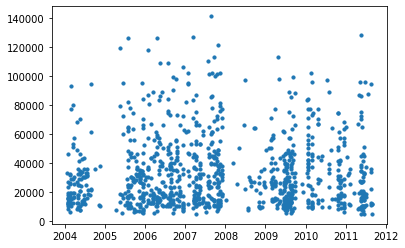

In [6]:
fig, ax = plt.subplots()
ax.scatter(TrainValidate["saledate"][:1000], TrainValidate["SalePrice"][:1000],s=10)
#size=10 to accomodate every point in this subset of 1000

<b>2.) Histogram</b>

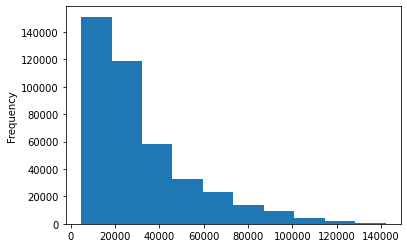

In [7]:
TrainValidate.SalePrice.plot.hist()

<h1><b> Overview Of DataSet</b></h1>
<br><br>
<b>1.)Row View</b>

In [8]:
TrainValidate.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>1.)Column View</b>

In [9]:
TrainValidate.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


<br><br>
<b>Sorting DataFrame W.R.T to SalesDate</b>

In [10]:
TrainValidate.sort_values(by=["saledate"], inplace=True, ascending=True)
TrainValidate.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

<h1><b>Make a copy of the Original DataFrame</b></h1>
<br>
<p><b>Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.
    <br>
    This will keep the original DataFrame in tact if we need it again.</b></p>

In [11]:
# Make a copy of the original DataFrame to perform edits on
TrainValidate_tmp = TrainValidate.copy()

<h2><b>Create a DashBoard for quick Analysis</b></h2>

In [12]:
dtale.show(TrainValidate)

2020-10-09 13:03:25,539 - INFO     - NumExpr defaulting to 8 threads.


<h1><b>Feature Engineering</b></h1>

<b>Add datetime Attributes for saledate column</b>

In [13]:
# Add datetime parameters for saledate
TrainValidate_tmp["saleYear"] = TrainValidate_tmp.saledate.dt.year
TrainValidate_tmp["saleMonth"] = TrainValidate_tmp.saledate.dt.month
TrainValidate_tmp["saleDay"] = TrainValidate_tmp.saledate.dt.day
TrainValidate_tmp["saleDayofweek"] = TrainValidate_tmp.saledate.dt.dayofweek
TrainValidate_tmp["saleDayofyear"] = TrainValidate_tmp.saledate.dt.dayofyear

# Drop original saledate
TrainValidate_tmp.drop("saledate", axis=1, inplace=True)

<b> Overview (Column View) </b>

In [14]:
TrainValidate_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


<h1><b> Analysis of Sales with Regard to different Features</b></h1>
<br><br>
<b>1.)States</b>

In [15]:
TrainValidate_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

<b>2.)SaleYear</b>

In [16]:
TrainValidate_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

<b>3.)Product Group</b>

In [17]:
TrainValidate_tmp.ProductGroup.value_counts()

TEX    104230
TTT     82582
BL      81401
WL      73216
SSL     45011
MG      26258
Name: ProductGroup, dtype: int64

<b>Convert strings to categories</b>

In [18]:
# This will turn all of the string values into category values
for label, content in TrainValidate_tmp.items():
    if pd.api.types.is_string_dtype(content):
        TrainValidate_tmp[label] = content.astype("category").cat.as_ordered()

<b> Overview (Row View)</b>

In [19]:
TrainValidate_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

<b>Checking Categories of newly changed feature (states)</b>

In [20]:
TrainValidate_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

<h1><b>Filling Missing Value</b></h1>

<b><h3>We know two things:</h3>
    <ol>
    <li>All of our data has to be numerical</li>
    <li>There can't be any missing values</li></ol></b>

<b>1.)Fill Numeric features</b>

In [21]:
# Fill numeric rows with the median
for label, content in TrainValidate_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            TrainValidate_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            TrainValidate_tmp[label] = content.fillna(content.median())

<b>We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.</b>

<b>2.) Filling and turning categorical variables to numbers</b>

>**a)Finding Categorical features with missing values**

In [22]:
# Check columns which *aren't* numeric
for label, content in TrainValidate_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


>**b)Turn categorical feature into numberic feature**

In [23]:

# Turn categorical variables into numbers
for label, content in TrainValidate_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        TrainValidate_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        TrainValidate_tmp[label] = pd.Categorical(content).codes+1

<h1><b> Overview Of DataSet</b></h1>
<br><br>
<b>1.)Row View</b>

In [24]:
TrainValidate_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


<b>2.)Column View</b>

In [25]:
TrainValidate_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


<b> Checking for missing value </b>

In [26]:
TrainValidate_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

<h2><b>Create a DashBoard for Quick Analysis</b></h2>

In [27]:
dtale.show(TrainValidate_tmp)

<h1><b>Modelling</b></h1>

<br><b>Intiating RandomForestRegressor</b>

In [28]:

%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(TrainValidate_tmp.drop("SalePrice", axis=1), TrainValidate_tmp.SalePrice)

Wall time: 5min 50s


RandomForestRegressor(n_jobs=-1)

<b>Scoring the Model</b>

In [29]:

# Score the model
model.score(TrainValidate_tmp.drop("SalePrice", axis=1), TrainValidate_tmp.SalePrice)

0.9875767584935246

>**This is not a Reliable Model as Score is very High. which indicates Overfitting!!**

<h3><b>Splitting data into train/valid sets</b></h3>
<br>
<ol><b>
    <li>Training = all samples up until 2011</li>
    <li>Valid = all samples form January 1, 2012 - April 30, 2012</li>
    <li>Test = all samples from May 1, 2012 - November 2012</li></b>
 </ol>

In [30]:
# Split data into training and validation
df_val = TrainValidate_tmp[TrainValidate_tmp.saleYear == 2012]
df_train = TrainValidate_tmp[TrainValidate_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

<h3><b>Split data into X & y</b></h3>

In [31]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

<h3><b>Building an evaluation function</b></h3>

In [32]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

<h3><b>Testing our model on a subset (to tune the hyperparameters)</b></h3>
<br>
<b>Let's alter the number of samples each n_estimator in the RandomForestRegressor using the max_samples parameter.</b>

In [33]:
Subset = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

>**Setting max_samples to 10000 means every n_estimator (default 100) in our RandomForestRegressor will only see 10000 random samples from our DataFrame instead of the entire 401,125.**

>**In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from)**

<h3><b>Reducing DataSet</b></h3>
<br>
<b> Simplified Model(Subset)</b>

In [34]:
%%time
# Cutting down the max number of samples each tree can see improves training time
Subset.fit(X_train, y_train)

Wall time: 16.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

<b> Score of Simplified Model(Subset)</b>

In [35]:
show_scores(Subset)

{'Training MAE': 5550.530376516048,
 'Valid MAE': 7139.475861055907,
 'Training RMSLE': 0.2571284771497947,
 'Valid RMSLE': 0.2923858899422114,
 'Training R^2': 0.8612225905203466,
 'Valid R^2': 0.8339037861928338}

<h2><b>Hyperparameter tuning with RandomizedSearchCV</b></h2>

In [36]:
%%time
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_Subset = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

rs_Subset.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Executing shutdown due to inactivity...


2020-10-09 14:04:00,614 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-10-09 14:04:08,790 - INFO     - Executing shutdown...
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 60.6min finished


Wall time: 1h 53s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

>**Find the best parameters from the RandomizedSearch**

In [37]:
rs_Subset.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

>**Evaluate the RandomizedSearch model**

In [38]:
show_scores(rs_Subset)

{'Training MAE': 5942.933149410674,
 'Valid MAE': 7284.202738613193,
 'Training RMSLE': 0.271388567979806,
 'Valid RMSLE': 0.29975097900148817,
 'Training R^2': 0.8432693148404363,
 'Valid R^2': 0.8310582733773128}

<h2><b>Train a model with the best parameters</b></h2>
<br>
<b>instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.</b>

>**Making Ideal Model**

In [39]:

%%time
# Most ideal hyperparameters
ideal_Subset = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_Subset.fit(X_train, y_train)

Wall time: 2min 14s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

>**Evaluate the Ideal model**

In [40]:
show_scores(ideal_Subset)

{'Training MAE': 2924.4750502887,
 'Valid MAE': 5907.679283603637,
 'Training RMSLE': 0.14329566764015697,
 'Valid RMSLE': 0.24394204769979488,
 'Training R^2': 0.9597421276876931,
 'Valid R^2': 0.8835497867224172}

<h1><b>Make predictions on test data</b></h1>

>**So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.**

In [41]:
Datatest = pd.read_csv("Data/Test.csv", parse_dates=["saledate"])
Datatest.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


<h2><b>Making PreProcessing Function for Test Dataset</b></h2>

In [42]:
def process_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

>**PreProcessing Data**

In [43]:
Datatest = process_data(Datatest)
Datatest.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


>**Check For Feature Equality**

In [44]:
set(X_train.columns) - set(Datatest.columns)

{'auctioneerID_is_missing'}

>**Mapping Test Dataset with Trainning Dataset**

In [45]:

# Match test dataset columns to training dataset
Datatest["auctioneerID_is_missing"] = False
Datatest.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


<h2><b>Create a DashBoard for Quick Analysis</b></h2>

In [46]:
dtale.show(Datatest)

<h2><b>Forming Dataframe to store predicted Value</b></h2>

In [47]:
preds = ideal_Subset.predict(Datatest)
df_preds = pd.DataFrame()
df_preds["SalesID"] = Datatest["SalesID"]
df_preds["SalePrice"] = preds
print(df_preds)

       SalesID     SalePrice
0      1227829  19041.053692
1      1227844  20246.860279
2      1227847  50193.615514
3      1227848  66307.535929
4      1227863  47455.123088
...        ...           ...
12452  6643171  44555.890086
12453  6643173  16279.709142
12454  6643184  15782.664932
12455  6643186  19935.195350
12456  6643196  29421.425815

[12457 rows x 2 columns]


<h1><b>Comparing loss in different Models</b></h1>

>**SubPlots** 

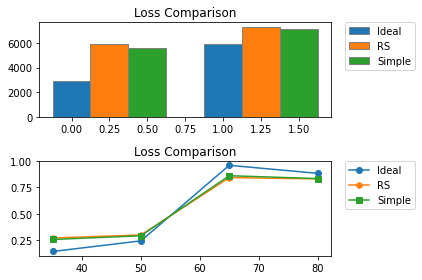

In [48]:
Ideal=show_scores(ideal_Subset)
RS=show_scores(rs_Subset)
Simple=show_scores(Subset)
k=list(Ideal.keys())
y1=list(Ideal.values())
y2=list(RS.values())
y3=list(Simple.values())
x=([5,20,35,50,65,80])
barWidth = 0.25
br1 = np.arange(len(y1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
a1 = plt.subplot2grid((4,4),(0,0),colspan = 4,rowspan=2)
a2 = plt.subplot2grid((4,4),(2,0), rowspan = 2,colspan=4)
#a1.plot(x[:2], y1[:2], label = "Ideal",marker="o")
#a1.plot(x[:2], y2[:2], label = "RS",marker="h")
#a1.plot(x[:2], y3[:2], label = "Simple",marker="s")
a1.bar( br1[:2],y1[:2], label = "Ideal",width = barWidth, edgecolor ='grey')
a1.bar( br2[:2],y2[:2], label = "RS",width = barWidth, edgecolor ='grey')
a1.bar( br3[:2],y3[:2], label = "Simple",width = barWidth, edgecolor ='grey')
a1.set_title("Loss Comparison")

a1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
a2.plot(x[2:], y1[2:], label = "Ideal",marker="o")
a2.plot(x[2:], y2[2:], label = "RS",marker="h")
a2.plot(x[2:], y3[2:], label = "Simple",marker="s")
 
a2.set_title("Loss Comparison")
a2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show() 

<h1><b>Feature Importance</b></h1>

>**This is where feature importance comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.**

>**In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price**

In [49]:
# Find feature importance of our best model
ideal_Subset.feature_importances_

array([3.42698278e-02, 1.92435444e-02, 4.10084148e-02, 1.61261979e-03,
       3.33887133e-03, 2.01896527e-01, 3.04048774e-03, 1.00345325e-03,
       3.87129550e-02, 4.62428228e-02, 6.40033063e-02, 4.68761926e-03,
       1.67659871e-02, 1.55287013e-01, 4.70551825e-02, 5.93229396e-03,
       3.04305332e-03, 1.69333992e-03, 3.80427901e-03, 6.17917482e-02,
       4.93832786e-04, 5.80434490e-05, 1.12787948e-03, 1.78691147e-04,
       1.00107965e-03, 1.54199923e-04, 9.88175430e-04, 7.60007019e-03,
       2.81874506e-03, 1.11729442e-03, 4.89168027e-03, 2.88658608e-03,
       4.29765279e-03, 2.78389443e-03, 1.45009020e-03, 8.42587011e-03,
       7.87745886e-04, 1.56367243e-02, 1.76155856e-03, 8.82014188e-04,
       1.27648909e-03, 9.09468538e-04, 2.69879314e-03, 6.17543312e-04,
       6.47540285e-04, 3.80059567e-04, 4.05953207e-04, 2.93646603e-03,
       8.19810541e-04, 2.38707812e-04, 3.01832862e-04, 7.38223144e-02,
       3.78438218e-03, 5.65551205e-03, 2.91024602e-03, 9.89400593e-03,
      

<h2><b>Creating a Ploting Function</b></h2>

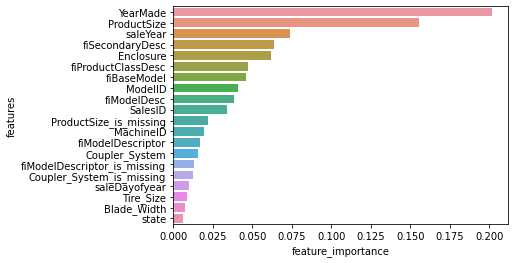

In [50]:
def pltfeatures(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
pltfeatures(X_train.columns, ideal_Subset.feature_importances_)